In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Simulate with exponential interarrival time
* Counting processs N(1) follows poisson distribution.
* Let $Y = N(t) + 1$.
* Let $t_n$ denotes the occurance time of the n-th event
* Number of events that occurs befor time 1 follows poisson distribution: $Y = min(n\ge1; t_n>1)$ 
* Get poisson as $N (1) = Y − 1$
* Recall that exponential distribution can be simulated as $-(1/\alpha)*log(1 - U_i)$ or $-(1/\alpha)*log(U_i)$

<img src="figs/poisson.png" alt="Drawing" style="height: 110px;"/>

ref: http://www.columbia.edu/~ks20/4404-Sigman/4404-Notes-ITM.pdf

In [2]:
def poisson(alpha = 5):
    uni = np.random.rand(alpha * 100)
    expo = - (1 / alpha) * np.log(uni)
    s = 0
    N = 0
    while s < 1:
        s += expo[N]
        N += 1
    return N - 1

#### Observation
* When lambda = 1, Poisson reduces to Exponential distribution.
* When lambda is large, Poisson looks like normal.


mean empirical: 3.00
mean analytical: 3.00
variance empirical: 3.02
variance analytical: 3.00



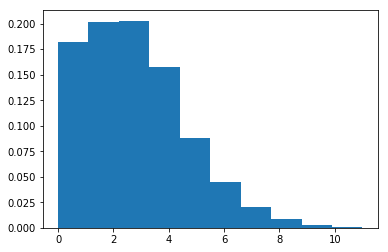

In [3]:
lamb = 3 # count / unit of time
m = [poisson(lamb) for _ in range(10000)]
plt.hist(m, density=True)

mean_empirical = np.mean(m)
var_empirical = np.var(m)

mean_analytical = lamb
var_analytical = lamb

print("""
mean empirical: %.2f
mean analytical: %.2f
variance empirical: %.2f
variance analytical: %.2f
"""%(mean_empirical, mean_analytical, 
     var_empirical, var_analytical))

plt.show()

In [4]:
def plot_poisson(m, ax):
    mean_empirical = np.mean(m)
    std_empirical = np.std(m)

    normal = np.random.normal(lamb, np.sqrt(lamb), len(m))
    ax.hist(m, density=True, bins=20, alpha=0.5)
    ax.hist(normal, density=True, bins=20, alpha=0.5)
    ax.legend(["poisson lambda=%i"%lamb, "normal mean=%i"%lamb])

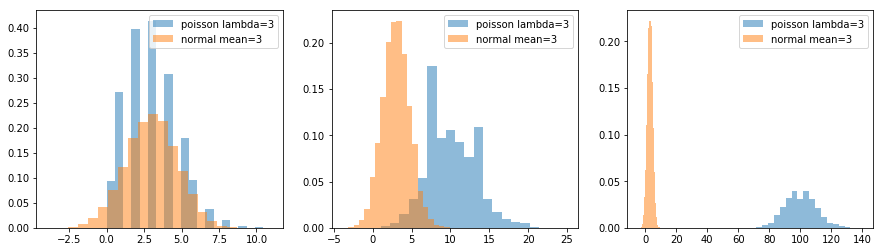

In [5]:
plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
m = [poisson(3) for _ in range(10000)]
plot_poisson(m, ax=ax1)

ax2 = plt.subplot(1, 3, 2)
m = [poisson(10) for _ in range(10000)]
plot_poisson(m, ax=ax2)

ax3 = plt.subplot(1, 3, 3)
m = [poisson(100) for _ in range(10000)]
plot_poisson(m, ax=ax3)

##### Using numpy

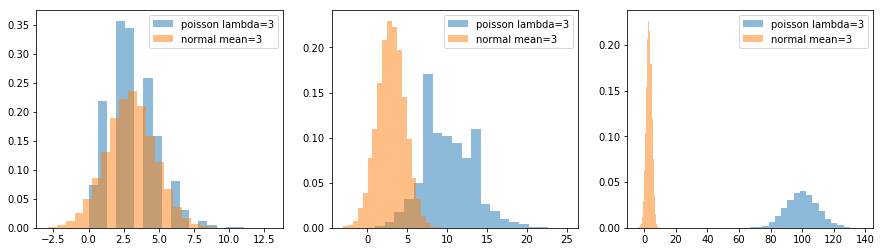

In [6]:
plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
m = np.random.poisson(3, size=10000)
plot_poisson(m, ax=ax1)

ax2 = plt.subplot(1, 3, 2)
m = np.random.poisson(10, size=10000)
plot_poisson(m, ax=ax2)

ax3 = plt.subplot(1, 3, 3)
m = np.random.poisson(100, size=10000)
plot_poisson(m, ax=ax3)

In [7]:
from scipy.stats import poisson

rv = poisson(mu=2)

rv.pmf(0)

0.1353352832366127